In [83]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing


In [84]:
df = pd.read_csv("../../australia.csv")

In [85]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

##### Charakterystyka (oprócz dwóch ostatnich) zmiennych sprzyja zastosowaniu normalizacji.

In [87]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


In [88]:
df.select_dtypes("float64")

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2


In [89]:
data = pd.DataFrame(preprocessing.normalize(df.select_dtypes("float64"), axis = 0), columns = df.columns[0:16])
data.insert(len(data.columns), df.columns[16], df.RainToday)
target = df.RainTomorrow
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.005052,0.005880,0.0,0.007621,0.006021,0.004700,0.001424,0.003909,0.001231,0.001022,0.004165,0.004167,0.001657,0.00415,0.005786,0.005929,0
1,0.005194,0.004828,0.0,0.009399,0.006364,0.003623,0.004510,0.003714,0.001846,0.000629,0.004192,0.004199,0.000829,0.00083,0.004416,0.004793,0
2,0.005476,0.006281,0.0,0.006859,0.005189,0.004504,0.007120,0.002932,0.002584,0.001729,0.004189,0.004187,0.000829,0.00498,0.006243,0.006195,0
3,0.006181,0.006415,0.0,0.007240,0.005972,0.003035,0.001424,0.001173,0.002276,0.001729,0.004191,0.004186,0.000829,0.00415,0.006330,0.006319,0
4,0.006831,0.006849,0.0,0.007113,0.004112,0.003427,0.004035,0.002541,0.001169,0.001179,0.004183,0.004179,0.000829,0.00498,0.007309,0.006674,0


In [90]:
pd.testing.assert_frame_equal(data == 0, df.iloc[:, 0:len(data.columns)] == 0)

In [91]:
print(target.value_counts(True))
print(data.RainToday.value_counts(True))

0    0.779741
1    0.220259
Name: RainTomorrow, dtype: float64
0    0.779121
1    0.220879
Name: RainToday, dtype: float64


## Podział danych na część treningową oraz testową

In [92]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.1, random_state=89)

In [93]:
data_train.shape

(50778, 17)

In [94]:
target_train.value_counts(True)

0    0.780889
1    0.219111
Name: RainTomorrow, dtype: float64

## Wykorzystanie trzech modeli klasyfikujących:<br>Gradient Boosting, CatBoost, Logistic Regression

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
#! python3 -m pip install catboost
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

gbc = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 4, random_state = 89)
catbc = CatBoostClassifier(iterations = 80, learning_rate = 0.2, depth = 6, random_seed = 89)
lr = LogisticRegression(max_iter = 80, random_state = 89)

#### Wybrane parametry:
* Gradient Boosting Classifier:<br>
a) learning_rate - parametr, według którego model ogranicza wpływ poszczególnych drzew<br>
b) max_depth - maksymalna głębokość pojedynczego drzewa predykcyjnego<br>
c) random_state - ziarno losowości
* CatBoost Classifier:<br>
a) iterations - liczba drzew w modelu<br>
b) learning_rate - ogranicza "skok gradientu"<br>
c) depth - głębokość pojedynczego drzewa - optymalne od 4 do 10, rekomendowane od 6 do 10<br>
d) random_seed - ziarno losowości
* Logistic Regression:<br>
a) max_iter - maksymalna liczba iteracji do uzyskania zbieżności wyniku<br>
b) random_state - ziarno losowości


In [96]:
gbc_model = gbc.fit(data_train, target_train)
catbc_model = catbc.fit(data_train, target_train, verbose = False)
lr_model = lr.fit(data_train, target_train)

In [97]:
gbc_pred = gbc_model.predict(data_test)
catbc_pred = catbc_model.predict(data_test)
lr_pred = lr_model.predict(data_test)
ar_target_test = np.array(target_test)

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score

Functions = [accuracy_score, precision_score, recall_score, f1_score]
predicts = [{"name": "GradientBoostingClassifier", "pred": gbc_pred},
            {"name": "CatBoostClassifier", "pred": catbc_pred},
            {"name": "LogisticRegression", "pred": lr_pred}]
for predict in predicts:
    sum = 0
    for f in Functions:
        val = f(ar_target_test, predict.get("pred"))
        sum += val
        print(f.__name__ + " for "+ predict.get("name")+" is: " + str(val))
    print("\nAverage score for " +predict.get("name") + " is: " + str(sum/4) + "\n")

accuracy_score for GradientBoostingClassifier is: 0.8589152782701169
precision_score for GradientBoostingClassifier is: 0.7643979057591623
recall_score for GradientBoostingClassifier is: 0.5611068408916219
f1_score for GradientBoostingClassifier is: 0.6471631205673759

Average score for GradientBoostingClassifier is: 0.7078957863720693

accuracy_score for CatBoostClassifier is: 0.8605104572846508
precision_score for CatBoostClassifier is: 0.7739872068230277
recall_score for CatBoostClassifier is: 0.5580322828593389
f1_score for CatBoostClassifier is: 0.6485037963376508

Average score for CatBoostClassifier is: 0.710258435826167

accuracy_score for LogisticRegression is: 0.7766749379652605
precision_score for LogisticRegression is: 0.9767441860465116
recall_score for LogisticRegression is: 0.03228285933897002
f1_score for LogisticRegression is: 0.062499999999999986

Average score for LogisticRegression is: 0.46205049583768554



### Wnioski:

Najlepiej spisały się modele wykorzystujące Boosting - GradientBoostingClassifier oraz CatBoost, które osiągnęły niemal równe wyniki każdej z miar, z delikatnym wskazaniem na CatBoost. Pakiet ten słynie z dobrego kodowania zmiennych kategorycznych, a w przypadku naszych danych nie miał szansy się wykazać. Spory rozrzut wyników miar jest w przypadku Regresji Logistycznej, można z tego faktu wywnioskować, że model ją implementujący, rzadko kiedy przewidywał deszcz na następny dzień, jednak kiedy to robił, to zazwyczaj miał rację. Jednakże niższy wynik Accuracy nakazuje go umieścić półkę niżej niż pozostałe metody.

## Krzywe ROC AUC:


In [99]:
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(target_test, gbc_pred)
roc_auc = auc(fpr, tpr)

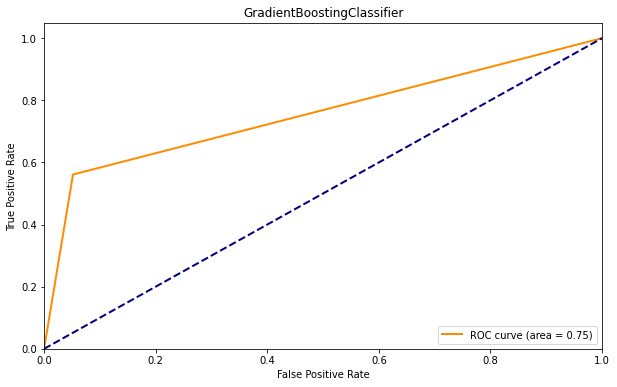

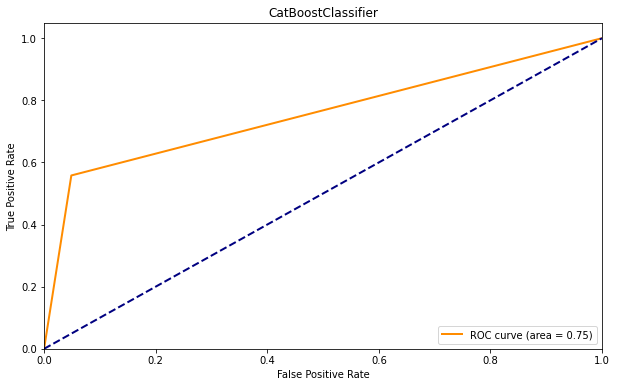

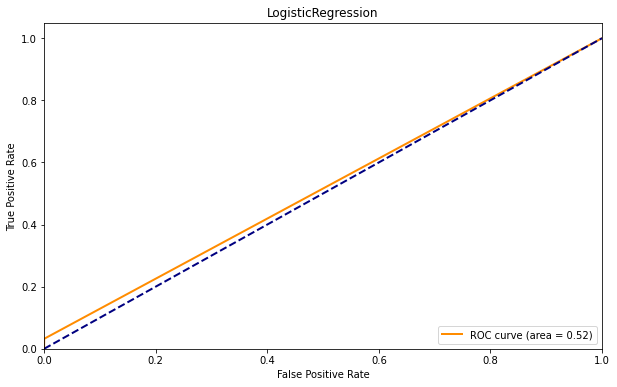

In [100]:
def rysuj_roc(pred):
    fpr, tpr, _ = roc_curve(target_test, pred.get("pred"))
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(pred.get("name"))
    plt.legend(loc="lower right")
    plt.show()

for prediction in predicts:
    rysuj_roc(prediction)

Wnioski wyciągane z analizy krzywej ROC mogą być podobne do poprzednich.

### Testowo - sprawdźmy też Cross Validation

In [101]:
from sklearn.model_selection import cross_val_score
tmp = cross_val_score(catbc_model, data, np.array(target), scoring='f1', cv = 10).mean()

0:	learn: 0.5982386	total: 5.32ms	remaining: 420ms
1:	learn: 0.5321779	total: 10.4ms	remaining: 405ms
2:	learn: 0.4855445	total: 16ms	remaining: 411ms
3:	learn: 0.4505211	total: 21ms	remaining: 400ms
4:	learn: 0.4233719	total: 26.5ms	remaining: 397ms
5:	learn: 0.4037373	total: 41.9ms	remaining: 516ms
6:	learn: 0.3890367	total: 57ms	remaining: 595ms
7:	learn: 0.3769420	total: 64.2ms	remaining: 578ms
8:	learn: 0.3686399	total: 69.5ms	remaining: 549ms
9:	learn: 0.3610613	total: 79.3ms	remaining: 555ms
10:	learn: 0.3552285	total: 87.2ms	remaining: 547ms
11:	learn: 0.3506392	total: 94.5ms	remaining: 536ms
12:	learn: 0.3471891	total: 102ms	remaining: 524ms
13:	learn: 0.3443079	total: 110ms	remaining: 519ms
14:	learn: 0.3418255	total: 118ms	remaining: 510ms
15:	learn: 0.3396184	total: 127ms	remaining: 506ms
16:	learn: 0.3378790	total: 132ms	remaining: 488ms
17:	learn: 0.3363988	total: 137ms	remaining: 471ms
18:	learn: 0.3350902	total: 144ms	remaining: 463ms
19:	learn: 0.3336782	total: 150ms	r

22:	learn: 0.3312954	total: 219ms	remaining: 543ms
23:	learn: 0.3304307	total: 227ms	remaining: 529ms
24:	learn: 0.3295940	total: 234ms	remaining: 514ms
25:	learn: 0.3287473	total: 240ms	remaining: 498ms
26:	learn: 0.3282697	total: 249ms	remaining: 488ms
27:	learn: 0.3273502	total: 256ms	remaining: 476ms
28:	learn: 0.3264453	total: 263ms	remaining: 463ms
29:	learn: 0.3258244	total: 282ms	remaining: 470ms
30:	learn: 0.3251349	total: 297ms	remaining: 470ms
31:	learn: 0.3246237	total: 306ms	remaining: 460ms
32:	learn: 0.3240614	total: 315ms	remaining: 448ms
33:	learn: 0.3236554	total: 323ms	remaining: 437ms
34:	learn: 0.3233096	total: 333ms	remaining: 428ms
35:	learn: 0.3229055	total: 354ms	remaining: 432ms
36:	learn: 0.3224674	total: 367ms	remaining: 427ms
37:	learn: 0.3220382	total: 379ms	remaining: 419ms
38:	learn: 0.3215810	total: 387ms	remaining: 407ms
39:	learn: 0.3211674	total: 398ms	remaining: 398ms
40:	learn: 0.3207461	total: 406ms	remaining: 386ms
41:	learn: 0.3203644	total: 429

43:	learn: 0.3223675	total: 562ms	remaining: 460ms
44:	learn: 0.3218389	total: 571ms	remaining: 444ms
45:	learn: 0.3213054	total: 582ms	remaining: 430ms
46:	learn: 0.3208262	total: 590ms	remaining: 414ms
47:	learn: 0.3204825	total: 600ms	remaining: 400ms
48:	learn: 0.3202189	total: 607ms	remaining: 384ms
49:	learn: 0.3197613	total: 616ms	remaining: 369ms
50:	learn: 0.3195576	total: 623ms	remaining: 354ms
51:	learn: 0.3190993	total: 633ms	remaining: 341ms
52:	learn: 0.3189348	total: 640ms	remaining: 326ms
53:	learn: 0.3186149	total: 648ms	remaining: 312ms
54:	learn: 0.3183254	total: 658ms	remaining: 299ms
55:	learn: 0.3180812	total: 670ms	remaining: 287ms
56:	learn: 0.3175351	total: 677ms	remaining: 273ms
57:	learn: 0.3171890	total: 687ms	remaining: 261ms
58:	learn: 0.3168634	total: 697ms	remaining: 248ms
59:	learn: 0.3164416	total: 705ms	remaining: 235ms
60:	learn: 0.3161271	total: 728ms	remaining: 227ms
61:	learn: 0.3155629	total: 739ms	remaining: 215ms
62:	learn: 0.3151762	total: 750

47:	learn: 0.3186683	total: 423ms	remaining: 282ms
48:	learn: 0.3182940	total: 433ms	remaining: 274ms
49:	learn: 0.3178530	total: 442ms	remaining: 265ms
50:	learn: 0.3174033	total: 450ms	remaining: 256ms
51:	learn: 0.3170549	total: 458ms	remaining: 247ms
52:	learn: 0.3167131	total: 464ms	remaining: 237ms
53:	learn: 0.3163392	total: 485ms	remaining: 234ms
54:	learn: 0.3161103	total: 498ms	remaining: 226ms
55:	learn: 0.3156577	total: 512ms	remaining: 219ms
56:	learn: 0.3151604	total: 520ms	remaining: 210ms
57:	learn: 0.3146798	total: 528ms	remaining: 200ms
58:	learn: 0.3143654	total: 539ms	remaining: 192ms
59:	learn: 0.3140988	total: 560ms	remaining: 187ms
60:	learn: 0.3137683	total: 575ms	remaining: 179ms
61:	learn: 0.3133180	total: 585ms	remaining: 170ms
62:	learn: 0.3128757	total: 596ms	remaining: 161ms
63:	learn: 0.3124438	total: 606ms	remaining: 151ms
64:	learn: 0.3120065	total: 614ms	remaining: 142ms
65:	learn: 0.3117600	total: 623ms	remaining: 132ms
66:	learn: 0.3114159	total: 646

61:	learn: 0.3126507	total: 982ms	remaining: 285ms
62:	learn: 0.3124271	total: 989ms	remaining: 267ms
63:	learn: 0.3121683	total: 995ms	remaining: 249ms
64:	learn: 0.3118452	total: 1.02s	remaining: 235ms
65:	learn: 0.3115370	total: 1.03s	remaining: 218ms
66:	learn: 0.3112239	total: 1.03s	remaining: 201ms
67:	learn: 0.3110428	total: 1.04s	remaining: 184ms
68:	learn: 0.3107410	total: 1.05s	remaining: 167ms
69:	learn: 0.3104420	total: 1.05s	remaining: 151ms
70:	learn: 0.3100466	total: 1.06s	remaining: 134ms
71:	learn: 0.3099085	total: 1.07s	remaining: 119ms
72:	learn: 0.3094994	total: 1.07s	remaining: 103ms
73:	learn: 0.3092567	total: 1.08s	remaining: 87.6ms
74:	learn: 0.3089469	total: 1.09s	remaining: 72.4ms
75:	learn: 0.3085663	total: 1.1s	remaining: 57.7ms
76:	learn: 0.3083968	total: 1.1s	remaining: 43.1ms
77:	learn: 0.3080291	total: 1.13s	remaining: 28.9ms
78:	learn: 0.3076875	total: 1.14s	remaining: 14.4ms
79:	learn: 0.3075474	total: 1.15s	remaining: 0us
0:	learn: 0.5985258	total: 5.

In [102]:
from sklearn.model_selection import cross_val_score
print("Średnia wartość miary F1 score dla Gradient Boosting Classifier przy CV: " +
      str(cross_val_score(gbc, data, np.array(target), scoring='f1', cv = 10).mean()))

print("Średnia wartość miary F1 score dla CatBoost Classifier przy CV: " + str(tmp))

print("Średnia wartość miary F1 score dla Logistic Regression przy CV: " +
      str(cross_val_score(lr, data, np.array(target), scoring='f1', cv = 10).mean()))

Średnia wartość miary F1 score dla Gradient Boosting Classifier przy CV: 0.605045383269183
Średnia wartość miary F1 score dla CatBoost Classifier przy CV: 0.6036487886468624
Średnia wartość miary F1 score dla Logistic Regression przy CV: 0.06313225448095751


Wyniki bez sprawdzianu krzyżowego:
GBC - 0.647
CatBC - 0.649
LR - 0.0625. Po krzyżowym sprawdzeniu wyniki modeli Boostingowych są średnio trochę niższe.

## Punkt bonusowy

In [103]:
allegro = pd.read_csv("~/Downloads/allegro-api-transactions.csv")
allegro.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


Zmienne lp, date oraz item_id nie powinny być brane pod uwagę przy określaniu ceny.

In [104]:
allegro = allegro.drop("lp",  axis = 1)
allegro = allegro.drop("date",  axis = 1)
allegro = allegro.drop("item_id",  axis = 1)

In [105]:
allegro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   categories              420020 non-null  object 
 1   pay_option_on_delivery  420020 non-null  int64  
 2   pay_option_transfer     420020 non-null  int64  
 3   seller                  420020 non-null  object 
 4   price                   420020 non-null  float64
 5   it_is_allegro_standard  420020 non-null  int64  
 6   it_quantity             420020 non-null  int64  
 7   it_is_brand_zone        420020 non-null  int64  
 8   it_seller_rating        420020 non-null  int64  
 9   it_location             420020 non-null  object 
 10  main_category           420020 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 35.2+ MB


In [106]:
allegro.loc[:, "it_location"] = allegro.it_location.str.lower()

In [107]:
allegro.select_dtypes("object").head()

,categories,seller,it_location,main_category
0,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",radzioch666,warszawa,Komputery
1,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",InwestycjeNET,warszawa,"Odzież, Obuwie, Dodatki"
2,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",otostyl_com,leszno,Dom i Ogród
3,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",Matfel1,wola krzysztoporska,Książki i Komiksy
4,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",PPHU_RICO,białystok,"Odzież, Obuwie, Dodatki"


In [108]:
for col in allegro.select_dtypes("object").columns:
    print("Liczba unkialnych wartości kolumny " + col + ": " + str(len(np.unique(allegro[col]))))

Liczba unkialnych wartości kolumny categories: 9020
Liczba unkialnych wartości kolumny seller: 51064
Liczba unkialnych wartości kolumny it_location: 7903
Liczba unkialnych wartości kolumny main_category: 27


Z powodu dużej liczby unikalnych wartości, skorzystamy z Target Encodingu dla kolumn categories, seller oraz it_location. Dla main_category wypróbujemy różne metody kodowania.

In [109]:
import category_encoders
te = category_encoders.target_encoder.TargetEncoder(allegro)
target_encoded_categories = te.fit_transform(allegro.categories, allegro.price)
te = category_encoders.target_encoder.TargetEncoder(allegro)
target_encoded_seller = te.fit_transform(allegro.seller, allegro.price)
te = category_encoders.target_encoder.TargetEncoder(allegro)
target_encoded_it_location = te.fit_transform(allegro.it_location, allegro.price)

In [110]:
allegro["categories"] = target_encoded_categories
allegro['seller'] = target_encoded_seller
allegro['it_location'] = target_encoded_it_location

In [111]:
target = allegro.price
allegro = allegro.drop("price", axis = 1)

In [112]:
allegro.head()

,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,61.839771,1,1,44.512149,1,997,0,50177,84.132898,Komputery
1,12.375798,1,1,7.868889,1,9288,0,12428,84.132898,"Odzież, Obuwie, Dodatki"
2,105.272597,1,1,132.503382,1,895,0,7389,64.883187,Dom i Ogród
3,24.072564,1,1,25.027386,0,971,0,15006,35.433365,Książki i Komiksy
4,17.102344,1,1,10.121538,1,950,0,32975,73.772916,"Odzież, Obuwie, Dodatki"


### Target encoding zmiennej main_category

In [113]:
import copy
te = category_encoders.target_encoder.TargetEncoder(allegro)
target_encoded_main_category = te.fit_transform(allegro.main_category, target)
te_allegro = copy.copy(allegro)
te_allegro['main_category'] = target_encoded_main_category

In [114]:
te_allegro.head()

,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,61.839771,1,1,44.512149,1,997,0,50177,84.132898,121.810064
1,12.375798,1,1,7.868889,1,9288,0,12428,84.132898,75.858049
2,105.272597,1,1,132.503382,1,895,0,7389,64.883187,72.434754
3,24.072564,1,1,25.027386,0,971,0,15006,35.433365,25.027497
4,17.102344,1,1,10.121538,1,950,0,32975,73.772916,75.858049


In [115]:
#Sprawdzenie czy w oryginalnej ramce nie zmieniła się kolumna main_category
allegro.head()

,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,61.839771,1,1,44.512149,1,997,0,50177,84.132898,Komputery
1,12.375798,1,1,7.868889,1,9288,0,12428,84.132898,"Odzież, Obuwie, Dodatki"
2,105.272597,1,1,132.503382,1,895,0,7389,64.883187,Dom i Ogród
3,24.072564,1,1,25.027386,0,971,0,15006,35.433365,Książki i Komiksy
4,17.102344,1,1,10.121538,1,950,0,32975,73.772916,"Odzież, Obuwie, Dodatki"


### One-Hot Encoding zmiennej main_category

In [116]:
ohe = category_encoders.one_hot.OneHotEncoder(allegro)

In [117]:
ohe_main_category = ohe.fit_transform(allegro.main_category, target)

In [118]:
ohe_allegro = copy.copy(allegro)
ohe_allegro.drop("main_category", axis = 1)
ohe_allegro = ohe_allegro.drop("main_category", axis = 1).join(ohe_main_category)

In [119]:
ohe_allegro.head()

,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category_1,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,61.839771,1,1,44.512149,1,997,0,50177,84.132898,1,...,0,0,0,0,0,0,0,0,0,0
1,12.375798,1,1,7.868889,1,9288,0,12428,84.132898,0,...,0,0,0,0,0,0,0,0,0,0
2,105.272597,1,1,132.503382,1,895,0,7389,64.883187,0,...,0,0,0,0,0,0,0,0,0,0
3,24.072564,1,1,25.027386,0,971,0,15006,35.433365,0,...,0,0,0,0,0,0,0,0,0,0
4,17.102344,1,1,10.121538,1,950,0,32975,73.772916,0,...,0,0,0,0,0,0,0,0,0,0


### Polynomial Coding zmiennej main_category

In [120]:
pe = category_encoders.polynomial.PolynomialEncoder(allegro)

In [121]:
pe_main_category = pe.fit_transform(allegro.main_category, target)

In [122]:
pe_main_category.head()

,intercept,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,1,-0.321208,0.385019,-0.407465,0.397966,-0.364802,0.316363,-0.260636,0.204436,-0.152825,...,-0.002429,0.001117,-0.000478,0.000189,-0.000069,0.000022,-0.000006,0.000002,-3.206859e-07,4.490507e-08
1,1,-0.296500,0.296168,-0.219404,0.091838,0.056123,-0.194685,0.300734,-0.361694,0.376184,...,0.026161,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696463e-06,-1.167532e-06
2,1,-0.271791,0.214426,-0.068956,-0.104083,0.241331,-0.296894,0.255825,-0.135242,-0.025863,...,-0.119078,0.071643,-0.039341,0.019631,-0.008835,0.003543,-0.001243,0.000370,-8.818863e-05,1.459415e-05
3,1,-0.247083,0.139791,0.047015,-0.211228,0.269392,-0.194685,0.025663,0.157258,-0.272734,...,0.286143,-0.209481,0.136451,-0.079261,0.040921,-0.018611,0.007334,-0.002432,6.413719e-04,-1.167532e-04
4,1,-0.296500,0.296168,-0.219404,0.091838,0.056123,-0.194685,0.300734,-0.361694,0.376184,...,0.026161,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696463e-06,-1.167532e-06


In [123]:
pe_main_category.intercept.value_counts()

1    420020
Name: intercept, dtype: int64

In [124]:
pe_allegro = copy.copy(allegro)
pe_allegro = pe_allegro.drop("main_category", axis = 1).join(pe_main_category)

In [125]:
pe_allegro.head()

,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,intercept,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,61.839771,1,1,44.512149,1,997,0,50177,84.132898,1,...,-0.002429,0.001117,-0.000478,0.000189,-0.000069,0.000022,-0.000006,0.000002,-3.206859e-07,4.490507e-08
1,12.375798,1,1,7.868889,1,9288,0,12428,84.132898,1,...,0.026161,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696463e-06,-1.167532e-06
2,105.272597,1,1,132.503382,1,895,0,7389,64.883187,1,...,-0.119078,0.071643,-0.039341,0.019631,-0.008835,0.003543,-0.001243,0.000370,-8.818863e-05,1.459415e-05
3,24.072564,1,1,25.027386,0,971,0,15006,35.433365,1,...,0.286143,-0.209481,0.136451,-0.079261,0.040921,-0.018611,0.007334,-0.002432,6.413719e-04,-1.167532e-04
4,17.102344,1,1,10.121538,1,950,0,32975,73.772916,1,...,0.026161,-0.013576,0.006512,-0.002868,0.001149,-0.000413,0.000131,-0.000035,7.696463e-06,-1.167532e-06


## Trenowanie modelu regresji liniowej na trzech ramkach danych:

In [126]:
def test_coding(data, target = target):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    linmodel = LinearRegression()
    data_train, data_test, target_train, target_test = train_test_split(data.get('model'),
                                                                        target, test_size=0.2, random_state=53)
    fitted = linmodel.fit(data_train, target_train)
    pred = fitted.predict(data_test)
    print("Wartość R2 dla metody kodowania " + data.get('name') + ": " + str(r2_score(target_test, pred)))
    print("Wartość RMSE dla metody kodowania " + data.get('name') + ": " +
          str(mean_squared_error(target_test, pred, squared = False #wtedy zwraca RMSE
                                )))
    
    

In [127]:
dfs = [{'name': 'Target Encoding', 'model': te_allegro}, {'name': 'One-Hot Encoding', 'model':
                                                          ohe_allegro}, {'name': 'Polynomial Encoding',
                                                                         'model': pe_allegro}]

for df in dfs:
    test_coding(df)


Wartość R2 dla metody kodowania Target Encoding: 0.4621478375391209
Wartość RMSE dla metody kodowania Target Encoding: 176.9239878232078
Wartość R2 dla metody kodowania One-Hot Encoding: 0.4622181469871516
Wartość RMSE dla metody kodowania One-Hot Encoding: 176.91242346096226
Wartość R2 dla metody kodowania Polynomial Encoding: 0.4622181469871496
Wartość RMSE dla metody kodowania Polynomial Encoding: 176.9124234609626


Sposób kodowania zmiennej main_category nie wpłynął na skuteczność modelu regresji liniowej.